In [1]:
# ============================================================
# Core Data Handling and Numerical Computing
# ============================================================

import numpy as np                  # Numerical computing
import pandas as pd                 # Data manipulation and analysis


# ============================================================
# Scikit-Learn: Preprocessing and Pipelines
# ============================================================

from sklearn.compose import ColumnTransformer      # Column-wise preprocessing
from sklearn.pipeline import Pipeline              # ML pipelines
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer           # Missing value handling


# ============================================================
# Scikit-Learn: Model Selection and Validation
# ============================================================

from sklearn.model_selection import (
    train_test_split,               # Train-test splitting
    KFold,                          # K-fold cross-validation
    StratifiedKFold,                # Stratified CV (mainly for classification)
    GridSearchCV,                   # Hyperparameter tuning
    cross_val_score                 # Cross-validation scoring
)


# ============================================================
# Scikit-Learn: Models and Custom Estimators
# ============================================================

from sklearn.linear_model import LinearRegression   # Baseline regression model
from sklearn.base import BaseEstimator, RegressorMixin  # Custom estimator support


# ============================================================
# Scikit-Learn: Evaluation Metrics
# ============================================================

from sklearn.metrics import mean_squared_error, r2_score


# ============================================================
# Visualization and Plotting
# ============================================================

import matplotlib.pyplot as plt     # Core plotting
import seaborn as sns               # Statistical visualization

from IPython.display import Image   # Display images in notebooks

from mlxtend.plotting import (
    scatterplotmatrix,              # Feature relationship plots
    heatmap                         # Correlation heatmaps
)


# ============================================================
# Reproducibility
# ============================================================

from numpy.random import seed        # Set random seed


# ============================================================
# Model Persistence (Saving/Loading Models)
# ============================================================

import pickle                        # Save trained models

In [2]:
import sys
print("Python executable:", sys.executable)

Python executable: c:\Users\vyrim\OneDrive\Documents\Homework\06Spring2026\Demo\DL_Demo\.venv\Scripts\python.exe


In [3]:
columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area',
           'Central Air', 'Total Bsmt SF', 'SalePrice']
df = pd.read_csv('C:/Users/vyrim/OneDrive/Documents/Homework/06Spring2026/Demo/DL_Demo/notebooks/AmesHousing.txt',sep='\t',usecols=columns)
df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


In [4]:
# Check the shape
df.shape

(2930, 6)

In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Overall Qual   2930 non-null   int64  
 1   Overall Cond   2930 non-null   int64  
 2   Total Bsmt SF  2929 non-null   float64
 3   Central Air    2930 non-null   str    
 4   Gr Liv Area    2930 non-null   int64  
 5   SalePrice      2930 non-null   int64  
dtypes: float64(1), int64(4), str(1)
memory usage: 137.5 KB


In [6]:
df.columns

Index(['Overall Qual', 'Overall Cond', 'Total Bsmt SF', 'Central Air',
       'Gr Liv Area', 'SalePrice'],
      dtype='str')

In [7]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns

In [8]:
numeric_features

Index(['Overall Qual', 'Overall Cond', 'Total Bsmt SF', 'Gr Liv Area',
       'SalePrice'],
      dtype='str')

In [9]:
cm=df[numeric_features].corr().values

(<Figure size 640x480 with 2 Axes>, <Axes: >)

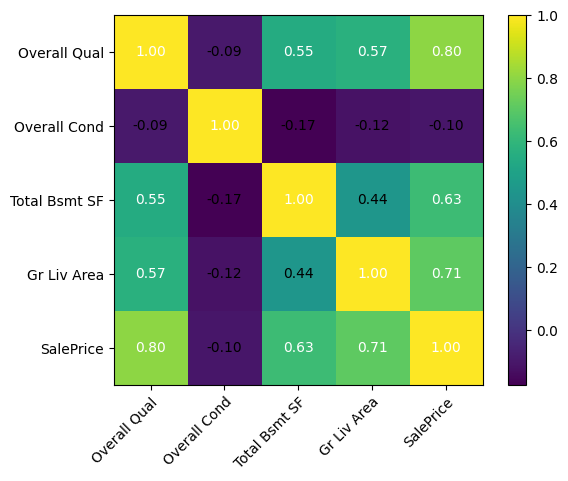

In [10]:
heatmap(cm, row_names=numeric_features, column_names=numeric_features)

In [11]:
class LinearRegressionGD(BaseEstimator, RegressorMixin):  # ← ADD INHERITANCE HERE so that we can use scikitlearn
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.array([0.])
        self.losses_ = []
        
        self.n_features_in_ = X.shape[1]  # ← ADD THIS ONE LINE (critical for sklearn validation)

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        return self.net_input(X)

In [12]:
df.columns

Index(['Overall Qual', 'Overall Cond', 'Total Bsmt SF', 'Central Air',
       'Gr Liv Area', 'SalePrice'],
      dtype='str')

In [13]:
x = df.drop('SalePrice',axis=1)
y = df['SalePrice']

In [14]:
x.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area
0,6,5,1080.0,Y,1656
1,5,6,882.0,Y,896
2,6,6,1329.0,Y,1329
3,7,5,2110.0,Y,2110
4,5,5,928.0,Y,1629


In [15]:
y.head()

0    215000
1    105000
2    172000
3    244000
4    189900
Name: SalePrice, dtype: int64

In [16]:
seed(1)
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=.20)

In [17]:
X_train.shape

(2344, 5)

In [18]:
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
numeric_features

Index(['Overall Qual', 'Overall Cond', 'Total Bsmt SF', 'Gr Liv Area'], dtype='str')

In [19]:
categorical_features=X_train.select_dtypes(include=['str']).columns
categorical_features

Index(['Central Air'], dtype='str')

In [20]:
num_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                        ('Scaler', StandardScaler())])

In [21]:
cat_pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                               ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [22]:
preprocessor = ColumnTransformer(transformers=[('num',num_pipeline,numeric_features), ('cat',cat_pipeline,categorical_features)])

In [23]:
preprocessor

,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``feature_name``. e.g. `

In [24]:
mod_pipeline = Pipeline([('preprocessor', preprocessor),
                        ('catmodel', LinearRegressionGD())])

In [25]:
mod_pipeline

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('catmodel', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers

In [26]:
seed(2)
mod_pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('catmodel', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers

In [27]:
y_train_pred = mod_pipeline.predict(X_train)
y_train_pred

array([170541.59629444, 178941.50749149, 182419.65085981, ...,
       213836.15637159,  13264.33664839, 218577.9621784 ], shape=(2344,))

In [28]:
y_test_pred = mod_pipeline.predict(X_test)
y_test_pred

array([ 9.39800587e+04,  1.29491795e+05,  1.83398603e+05,  1.82541469e+05,
        1.68798592e+05,  1.05366008e+05,  2.18347588e+05,  1.41645322e+05,
        1.15406548e+05,  1.16210523e+05,  1.59102897e+05,  1.81799492e+05,
        1.30865269e+05, -1.46561530e+04,  1.87062574e+05,  2.60518570e+05,
        9.07209828e+04,  1.68122219e+05,  1.01341799e+05,  1.53700661e+05,
        1.03559434e+05,  1.48996474e+05,  1.35177584e+05,  1.51363874e+05,
        2.06942256e+04,  8.47757870e+04,  1.39878281e+05,  2.51068024e+05,
        1.53699459e+05,  2.13756261e+05,  1.32357578e+05,  1.66399813e+05,
        3.12859191e+04,  2.79502791e+05,  1.41388182e+05,  2.32642297e+05,
        1.41576256e+05,  1.28614192e+05,  1.39753748e+05,  1.84631942e+05,
        5.80025138e+04,  1.87233631e+05,  2.24670210e+05,  1.95239845e+05,
        8.08329715e+04,  2.29762943e+05,  1.69277970e+05,  2.78766208e+05,
        1.73151779e+05,  1.31448947e+05,  1.55758610e+05,  1.07335089e+05,
        1.29372345e+05,  

In [29]:
r2_score(y_train,y_train_pred)

0.5950338382687492

In [30]:
r2_score(y_test,y_test_pred)

0.6376156906197679

In [31]:
np.sqrt(mean_squared_error(y_train,y_train_pred))

np.float64(50988.78804408165)

In [32]:
np.sqrt(mean_squared_error(y_test,y_test_pred))

np.float64(47407.61084790479)

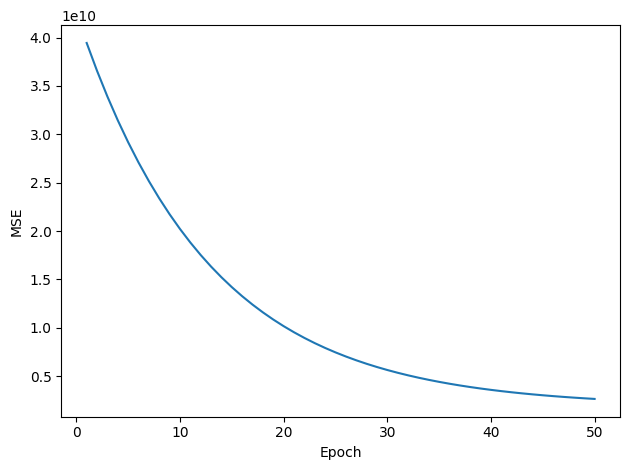

In [33]:
# Access the custom estimator FROM the pipeline
lr = mod_pipeline.named_steps['catmodel']  # ← critical: use step name here

# Plot loss history
plt.plot(range(1, lr.n_iter+1), lr.losses_)
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.tight_layout()
#plt.savefig('figures/09_06.png', dpi=300)
plt.show()
plt.show()

In [34]:
cv_pipeline = Pipeline([('preprocessor', preprocessor),
                        ('catmodel', LinearRegressionGD())])

In [35]:
cv1 = 5
scores = cross_val_score(cv_pipeline, X_train, y_train,
                         cv=cv1, scoring="r2")

In [36]:
scores

array([0.58429664, 0.54785346, 0.66052188, 0.54384487, 0.62718719])

In [37]:
scores.mean()

np.float64(0.5927408102232344)

In [38]:
scores.std()

np.float64(0.04529418822324362)

In [40]:
grid_pipeline = Pipeline([('preprocessor', preprocessor),
                        ('reg_SGD', LinearRegressionGD())])

In [41]:
# 1. Define parameter grid
param_grid = [{
    'reg_SGD__eta': [0.01, 0.05, 0.1],
    'reg_SGD__n_iter': [50, 100, 200]
}]

# 2. CV strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# 3. Grid search (optimizing MSE)
grid_search = GridSearchCV(
    estimator=grid_pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring='neg_mean_squared_error',  # ← Optimizes MSE
    n_jobs=-1,
    verbose=1
)



In [42]:
grid_search

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...ressionGD())])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","[{'reg_SGD__eta': [0.01, 0.05, ...], 'reg_SGD__n_iter': [50, 100, ...]}]"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'neg_mean_squared_error'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",KFold(n_split... shuffle=True)
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter c

In [43]:
seed(5)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...ressionGD())])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","[{'reg_SGD__eta': [0.01, 0.05, ...], 'reg_SGD__n_iter': [50, 100, ...]}]"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'neg_mean_squared_error'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",KFold(n_split... shuffle=True)
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter c

In [44]:
sorted(grid_search.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_reg_SGD__eta',
 'param_reg_SGD__n_iter',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [45]:
# 5. EXTRACT EXACT CV STATISTICS (no manual std calculation!)
best_idx = grid_search.best_index_
cv_mean_neg_mse = grid_search.cv_results_['mean_test_score'][best_idx]
cv_std_neg_mse = grid_search.cv_results_['std_test_score'][best_idx]

best_cv_mse = -cv_mean_neg_mse      # Convert to positive MSE
best_cv_mse_std = cv_std_neg_mse    # ← EXACT std from CV folds (no approximation!)

# 6. Print CV results (exact MSE ± std, RMSE mean only)
print(f"\n=== GRID SEARCH RESULTS ===")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV MSE : {best_cv_mse:.4f} ± {best_cv_mse_std:.4f}")
print(f"Best CV RMSE: {np.sqrt(best_cv_mse):.4f}")  # RMSE mean only (no std approximation)


=== GRID SEARCH RESULTS ===
Best parameters: {'reg_SGD__eta': 0.1, 'reg_SGD__n_iter': 200}
Best CV MSE : 1603209291.5456 ± 395442927.3265
Best CV RMSE: 40040.0960


In [46]:
# Best model
reg_sgd= grid_search.best_estimator_
reg_sgd.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('reg_SGD', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers 

In [47]:
# Generate predictions on training and test sets using the optimized model
y_pred_train = reg_sgd.predict(X_train)
y_pred_test = reg_sgd.predict(X_test)

# Compute metrics
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

In [48]:
print(r2_train)
print(r2_test)

0.7550359873248209
0.8039500852948213


In [50]:
# Save the model
with open('C:/Users/vyrim/OneDrive/Documents/Homework/06Spring2026/Demo/DL_Demo/models/house_price_model.pkl', 'wb') as f:
    pickle.dump(reg_sgd, f)

print("Model saved successfully!")



Model saved successfully!
